In this project, I will explore and analyze Kobe Braynt's shots selection.
To do so, I will collect, concat, and clean the dataset in order to get meaningful insights that will help me understand Kobes game better.

Kobe Braynt was one of the best basketball players I grew up watching and admiring as a child.
His work ethics and resilience aspired me as a person, as a young basketball player and every aspect of the proffesional career I want to develop as a Data Analyst.

In [ ]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns 
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('kobe_braynt_shot_selection.csv')

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
# Exploring the dataset columns and datatypes. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [5]:
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

There are approximatly 5000 null values in the shot_made_flag column. 
This column gives the information of whether a shot went in or not. Due to DataFrame size i can drop this values without any concern .

In [6]:
df = df[df['shot_made_flag'].isna() == False]

Lets explore columns that their meaning is not clear, and check that the unique values are valid.

In [7]:
for column in df:
    if column in ['action_type', 'combined_shot_type', 'shot_distance', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'season', 'shot_made_flag', 'playoffs', 'period', 'seconds_remaining', 'minutes_remaining']:
        print(f'|{column}| = {df[column].nunique()}\nUnique values:\n{df[column].unique()}')
        print('\n')

|action_type| = 55
Unique values:
['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'


I noticed that the season is a string, so in order to sort the dataframe by the season's date, we need it to be numeric.

In [8]:
# Function that split string by "-" and return the first slice plus 1 (the last year in the season).
def get_year_from_season(x):
    x = x.split('-')
    return int(x[0]) + 1

In [9]:
df['season'] = df['season'].apply(get_year_from_season)
df = df.sort_values('season')
df['season'].head()

23277    1997
23228    1997
23227    1997
23226    1997
23225    1997
Name: season, dtype: int64

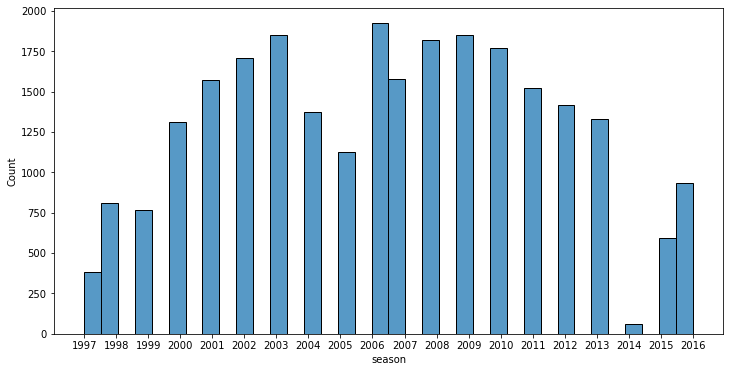

In [10]:
# Games distributions through seasons on the course of kobe braynt's whole carrer
fig = plt.figure(figsize=(12,6))


ax = sns.histplot(df['season'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))


<AxesSubplot:xlabel='shot_made_flag', ylabel='count'>

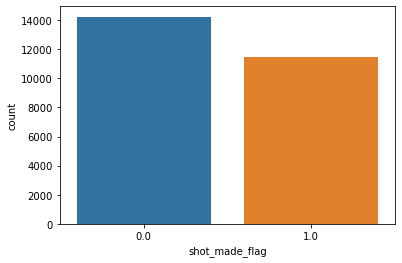

In [11]:
# Kobe's made shots and misses distirbution.
sns.countplot(data=df,x='shot_made_flag')

<AxesSubplot:>

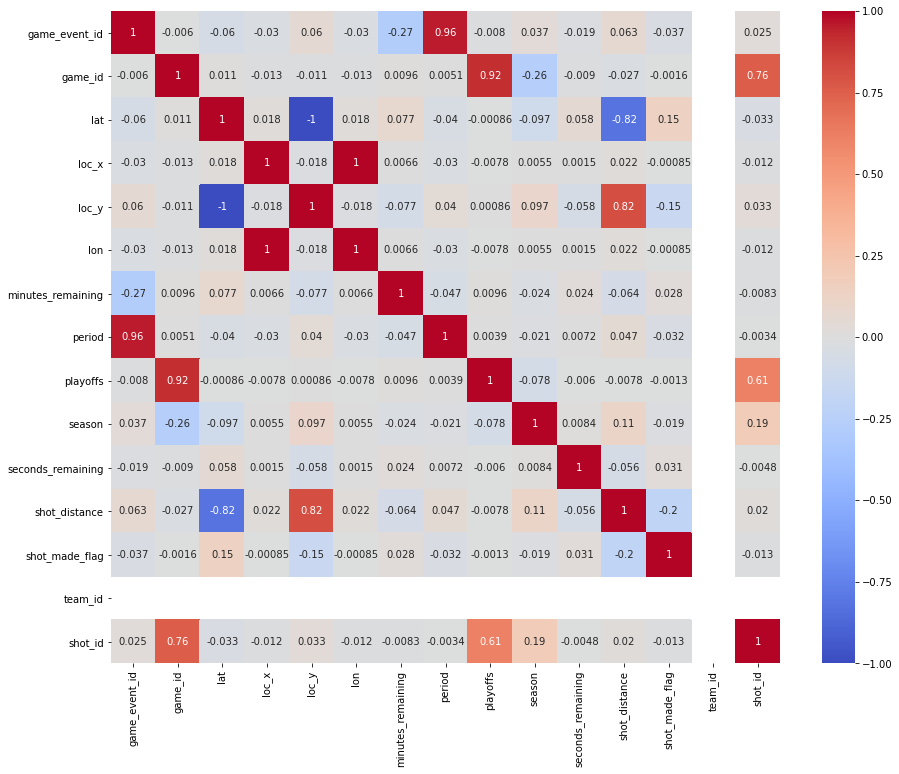

In [13]:
# Exploring the correlation between columsn in our df using heatamp
fig = plt.figure(figsize=(15,12))

sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

There is no significant insight about any intersting connection from this vizualization, also it neglect a major non-numeric columns that i explored earlier. Now I'm going to see them.

I took four different columns and vizualized the amount of appearences of each defintion while also see how the misses and makes distribute in every category.

<AxesSubplot:xlabel='shot_zone_range', ylabel='count'>

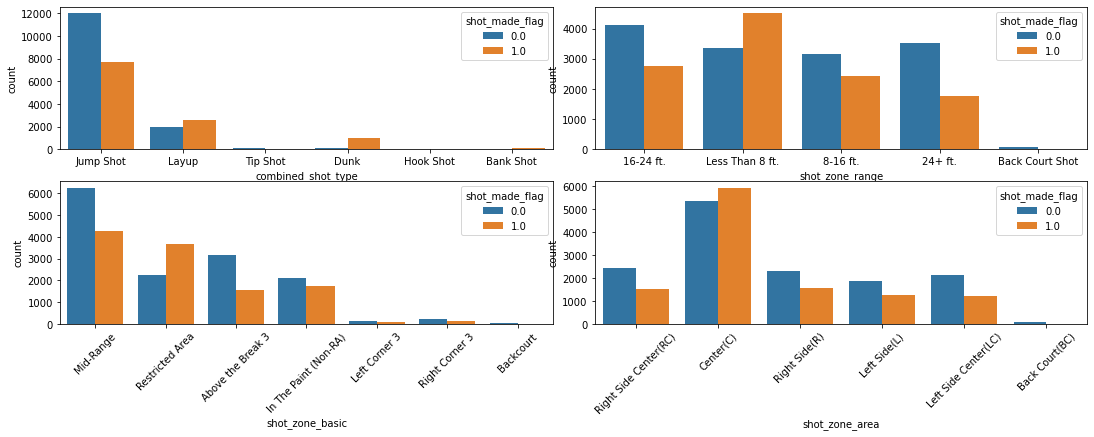

In [14]:
fig, axs = plt.subplots(2,2,figsize = (15,5))
fig.tight_layout()


ax = sns.countplot(data=df, x='shot_zone_basic', hue='shot_made_flag', ax=axs[1,0])
ax.set_xticklabels(df['shot_zone_basic'].unique(), rotation=45)

ax2 = sns.countplot(data=df, x='shot_zone_area', hue='shot_made_flag', ax=axs[1,1])
ax2.set_xticklabels(df['shot_zone_area'].unique(),rotation=45 )

sns.countplot(data=df, x='combined_shot_type', hue='shot_made_flag', ax=axs[0,0])

sns.countplot(data=df, x='shot_zone_range', hue='shot_made_flag', ax=axs[0,1])

Couple of things pop in to my eye. 

First of all, Kobe is barely shoot from the backcourt - obvious.

Most of his shots are jump shots that come in the mid range(8-24 ft) or layups in the paint (less than 8ft).

Additionally we can see that major part of the shots are from the center of the court.

Lets dive in to  see how his shots seperated on the court through Kobe's location.

In [15]:
shot_made_df = df[df['shot_made_flag'] == 1]
shot_missed_df = df[df['shot_made_flag'] == 0]

(-50.0, 900.0)

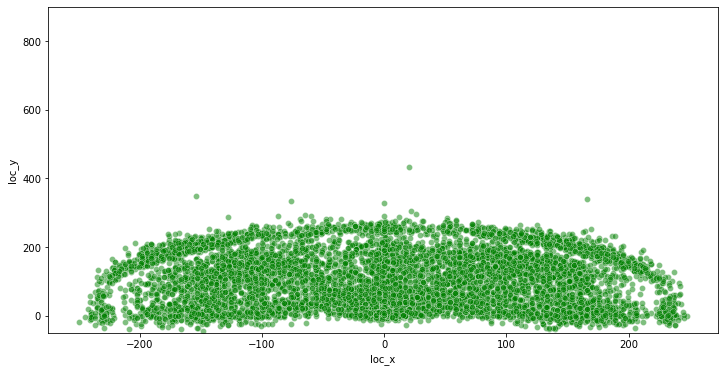

In [16]:
fig = plt.figure(figsize=(12,6))


sns.scatterplot(data=shot_made_df, x='loc_x', y='loc_y', color='green', alpha=0.5)
ax = plt.gca()
ax.set_ylim([-50,900])

(-50.0, 900.0)

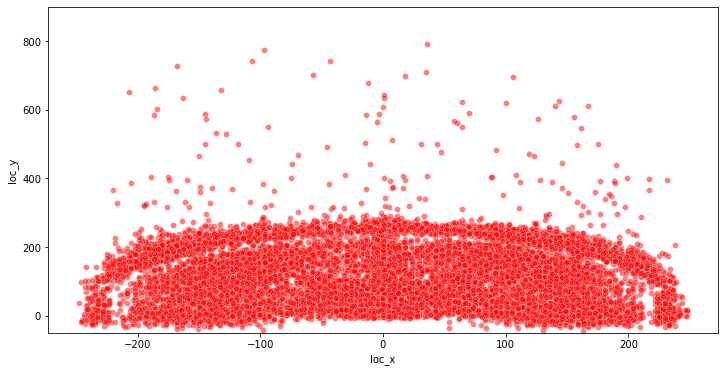

In [17]:
fig = plt.figure(figsize=(12,6))


sns.scatterplot(data=shot_missed_df, x='loc_x', y='loc_y', color='red', alpha=0.5)
ax = plt.gca()
ax.set_ylim([-50,900])

It seems reasonable, far away misses are not back court shots but 24+ ft shots.

Lets explore kobe's percantges throughout his carrer.

In [18]:
shooting_percantage_per_shot_type  = df.groupby('shot_type').mean()['shot_made_flag']*100
shooting_percantage_per_shot_type

shot_type
2PT Field Goal    47.734779
3PT Field Goal    32.926829
Name: shot_made_flag, dtype: float64

In [19]:
total_field_goal_percantage = df['shot_made_flag'].mean()*100
total_field_goal_percantage

44.61610304704829

In [20]:
shooting_percantage_per_season = df.groupby('season').mean()['shot_made_flag']*100
shooting_percantage_per_season = shooting_percantage_per_season.to_frame()
shooting_percantage_per_season.columns = ['shooting percantage']

# getting the shooting percantage per season, splitted by the field goal type.
a = df.groupby(['shot_type','season']).mean()['shot_made_flag']
a = a.to_frame().reset_index()

shooting_percantage_per_season['3pt shooting'] = ((a[a['shot_type'] == '3PT Field Goal']['shot_made_flag'])*100).values
shooting_percantage_per_season['2pt shooting'] = ((a[a['shot_type'] == '2PT Field Goal']['shot_made_flag'])*100).values

In [21]:
shooting_percantage_per_season

,shooting percantage,3pt shooting,2pt shooting
season,,,
1997,42.297650,35.433071,45.703125
1998,43.086420,35.751295,45.380875
1999,45.882353,27.027027,49.082569
2000,46.036585,30.508475,48.458150
2001,46.666667,32.820513,48.623188
2002,45.843091,32.298137,47.252747
2003,43.628510,38.006231,44.807315
2004,43.326039,30.451128,46.425339
2005,43.655723,35.329341,47.162673


It seems like there is little bit of decrease in the shooting percantages from the season_shooting_df , lets vizualize it.

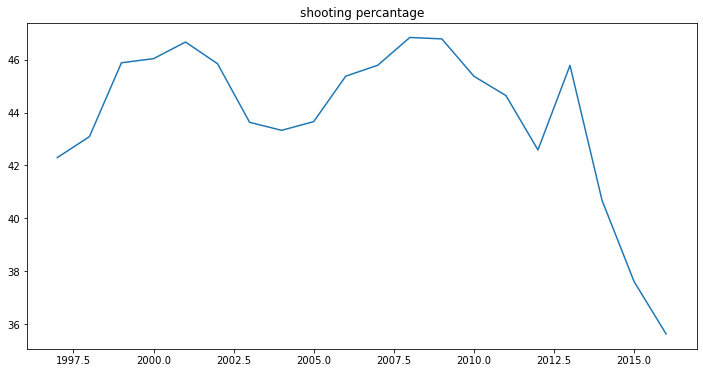

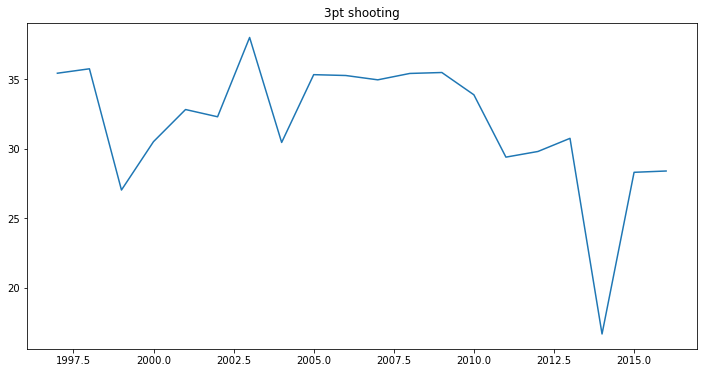

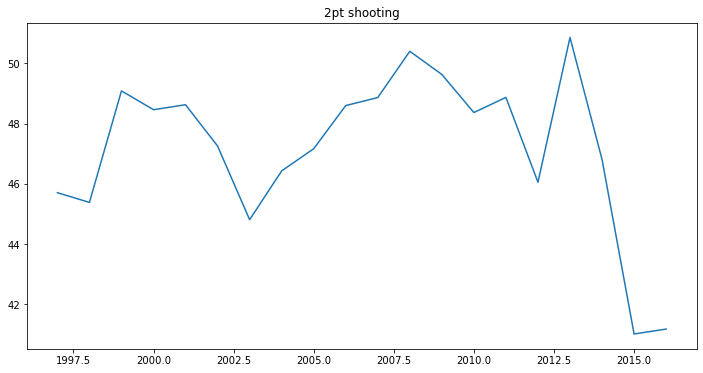

In [23]:
for column in shooting_percantage_per_season:
    fig = plt.figure(figsize=(12,6))
    ax = plt.plot(shooting_percantage_per_season.index, shooting_percantage_per_season[column])
    plt.title(column)

There is not a defenite decreasing pattern as i thought but we can still see an overall decrease in the shooting percantages.

<AxesSubplot:>

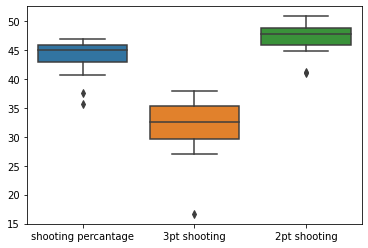

In [24]:
#Checking how the percantegs distribute and if there are outliers
sns.boxplot(data=shooting_percantage_per_season)

Lets explore more columns for new  insights.
I will start with the opponent column 

<AxesSubplot:xlabel='shot_made_flag', ylabel='opponent'>

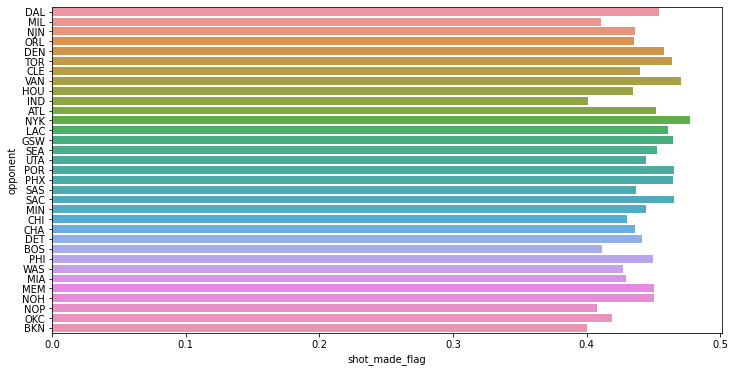

In [25]:
fig = plt.figure(figsize=(12,6))

sns.barplot(data=df,x='shot_made_flag',y='opponent',ci=None)

Once again, there isn't any significant differences.
Lets see if there are any profound difference of Kobe's shooting percantages between playoff and not playoff games (suppouse Kobe known as clutch player maybe there will be increase in his percantages on playoffs games).

In [26]:
df['playoffs'].unique()

array([0, 1], dtype=int64)

In [27]:
# Grouping this way with the sum function allows us to make the distinction later. 
grouped_playoff = df.groupby(['season','game_id']).sum()['playoffs']
grouped_playoff = grouped_playoff.to_frame().reset_index()

In [28]:
# If the sum of the "playoff" column, grouped by the game_id, is gretaer than zero - it means that it must be a playoff game.
playoff_games = grouped_playoff[grouped_playoff['playoffs'] > 0 ]['game_id']

In [29]:
playoff_games = df[df['game_id'].isin(playoff_games)]
playoff_games.groupby('shot_type').mean()['shot_made_flag']*100

shot_type
2PT Field Goal    47.398078
3PT Field Goal    32.523617
Name: shot_made_flag, dtype: float64

Almost the same as the carrer as a whole.

lets move to explore the relationship between the range/distance and shooting percantegas.

In [30]:
distance_from_hoop_percantage = (df.groupby('shot_distance').mean()['shot_made_flag'])*100
distance_from_hoop_percantage = distance_from_hoop_percantage.to_frame()
distance_from_hoop_percantage.columns = ['shooting_percantage']

<AxesSubplot:xlabel='shot_distance'>

<Figure size 864x432 with 0 Axes>

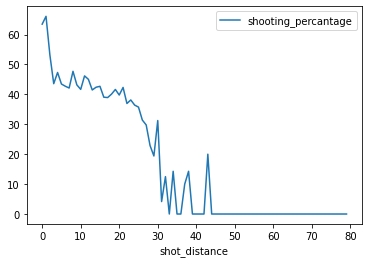

In [31]:
fig = plt.figure(figsize=(12,6))

distance_from_hoop_percantage.plot()

Quite reasonable.

Lets move on to check the relation to the shot_zone_range column, which describes the same but divided to categories.

<AxesSubplot:xlabel='shot_zone_range', ylabel='count'>

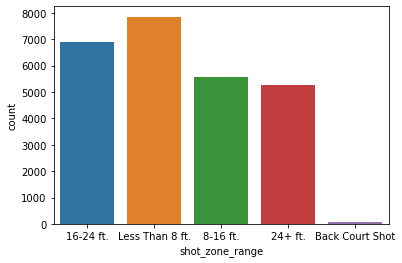

In [32]:
sns.countplot(data=df, x='shot_zone_range')

<AxesSubplot:xlabel='shot_zone_range', ylabel='count'>

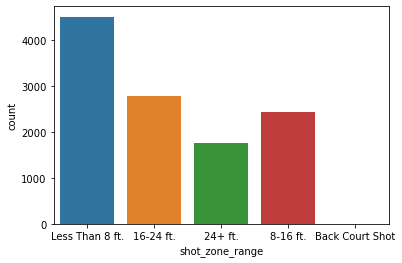

In [33]:
# How the success shots are divided
sns.countplot(data=shot_made_df, x='shot_zone_range')

<AxesSubplot:xlabel='shot_zone_range', ylabel='count'>

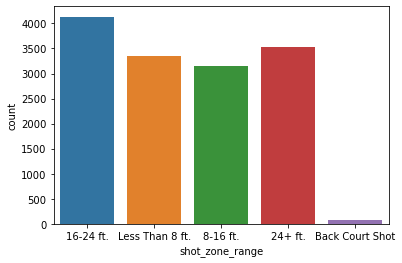

In [34]:
# How the misses divided 
sns.countplot(data=shot_missed_df,x='shot_zone_range')

In the investigation of the shot_zone_range column , i've revealed a mistake in the data

In [35]:
for shot_zone_range in df['shot_zone_range'].unique():
    print(f"{shot_zone_range}     --->    {df[df['shot_zone_range'] == shot_zone_range]['shot_type'].unique()}")

16-24 ft.     --->    ['2PT Field Goal' '3PT Field Goal']
Less Than 8 ft.     --->    ['2PT Field Goal' '3PT Field Goal']
8-16 ft.     --->    ['2PT Field Goal' '3PT Field Goal']
24+ ft.     --->    ['3PT Field Goal' '2PT Field Goal']
Back Court Shot     --->    ['3PT Field Goal' '2PT Field Goal']


From quick check, the nba 3 point line is 23'9 feet from the rim, therefore only the '16-24 ft.' category can have both of the shot types, the other must have only one shot type.

Lets check where are those outliers are and see if there is a mismatch between the columns shot_zone_range and the shot_distance.

In [36]:
mistakes_df_3_mask = (df['shot_zone_range'].isin(['Less Than 8 ft.','8-16 ft.'])) & (df['shot_type'] == '3PT Field Goal')
mistakes_df_2_mask = (df['shot_zone_range'].isin(['24+ ft.','Back Court Shot'])) & (df['shot_type'] == '2PT Field Goal')

mistakes_df_3 = df[mistakes_df_3_mask]
mistakes_df_2 = df[mistakes_df_2_mask]

In [37]:
mistakes_df_3[['shot_zone_range', 'shot_distance', 'shot_type']]

,shot_zone_range,shot_distance,shot_type
22904,Less Than 8 ft.,0,3PT Field Goal
14512,8-16 ft.,9,3PT Field Goal


In [38]:
mistakes_df_2[['shot_zone_range', 'shot_distance', 'shot_type']]

,shot_zone_range,shot_distance,shot_type
2224,24+ ft.,22,2PT Field Goal
3409,24+ ft.,23,2PT Field Goal
5250,Back Court Shot,50,2PT Field Goal
9103,24+ ft.,26,2PT Field Goal


As you can see from the dataframes above:

in the 3 points shot type, the mistake was in the entered shot_type.

in the 2 points shot type, in the first 2 rows the mistake was in the entered shot_zone_range, and in the rest of them, the problem was in the shot_type.


lets fix those outliers, assuming the shot_distance column is valid, without mistakes in the entering.

In [39]:
df.loc[mistakes_df_3_mask & (df['shot_distance'] < 24), 'shot_type'] = '2PT Field Goal'
df.loc[mistakes_df_3_mask & (df['shot_distance'] >= 24), 'shot_zone_range'] = '24+ ft.' 

In [40]:
df.loc[mistakes_df_2_mask & (df['shot_distance'].isin(range(16, 24, 1))), 'shot_zone_range'] = '16-24 ft.'
df.loc[mistakes_df_2_mask & (df['shot_distance'].isin(range(8, 16, 1))), 'shot_zone_range'] = '8-16 ft.'
df.loc[mistakes_df_2_mask & (df['shot_distance'].isin(range(0, 8, 1))), 'shot_zone_range'] = 'Less Than 8 ft.'
df.loc[mistakes_df_2_mask & (df['shot_distance'] >= 24), 'shot_type'] = '3PT Field Goal' 

In [41]:
for shot_zone_range in df['shot_zone_range'].unique():
    print(f"{shot_zone_range}     --->    {df[df['shot_zone_range'] == shot_zone_range]['shot_type'].unique()}")

16-24 ft.     --->    ['2PT Field Goal' '3PT Field Goal']
Less Than 8 ft.     --->    ['2PT Field Goal']
8-16 ft.     --->    ['2PT Field Goal']
24+ ft.     --->    ['3PT Field Goal']
Back Court Shot     --->    ['3PT Field Goal']


Now that we are past that issue lets check the percantages for the shot zone range

In [42]:
shot_zone_percantge = df.groupby('shot_zone_range').mean()['shot_made_flag'] * 100
shot_zone_percantge

shot_zone_range
16-24 ft.          40.165002
24+ ft.            33.263876
8-16 ft.           43.548387
Back Court Shot     1.388889
Less Than 8 ft.    57.311951
Name: shot_made_flag, dtype: float64

Of course it match the graph we saw earlier    

Lets examine the columns minutes_remaining, period, seconds_remaining in order to see their effect on kobe braynt's shooting percantage, we will plot it out directly.

<Figure size 864x432 with 0 Axes>

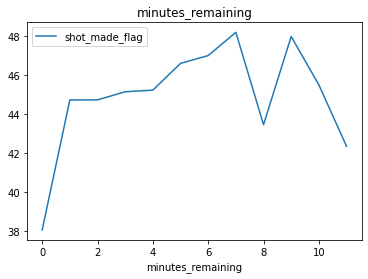

<Figure size 864x432 with 0 Axes>

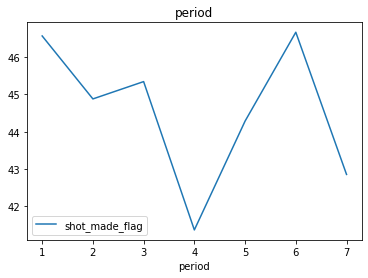

<Figure size 864x432 with 0 Axes>

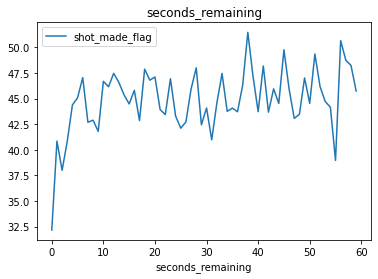

In [43]:
for column in ['minutes_remaining', 'period', 'seconds_remaining']:
    column_percentage = (df.groupby(column).mean()['shot_made_flag']) * 100
    column_percentage = column_percentage.to_frame()
    
    fig = plt.figure(figsize=(12, 6))
    column_percentage.plot()
    plt.title(column)

As can be seen from the graph of the minutes_remaining, there is a decresing the Kobe's shooting percentages when the time goes down (somewhere after 2 minutes remaining). and in the other timezones there is no significant pattern.